In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [4]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
df = pd.read_csv('iris-dataset.csv', names=cols)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Analizando os Dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
label           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


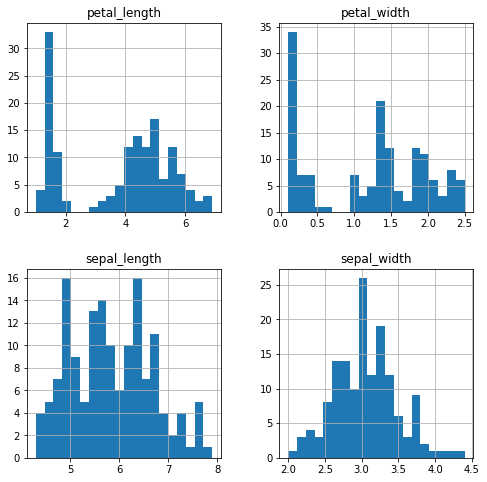

In [8]:
df.hist(bins=20, figsize=(8,8));

In [9]:
df.corr().style.set_precision(4)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1,-0.1094,0.8718,0.818
sepal_width,-0.1094,1,-0.4205,-0.3565
petal_length,0.8718,-0.4205,1,0.9628
petal_width,0.818,-0.3565,0.9628,1


In [10]:
df['label'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: label, dtype: int64

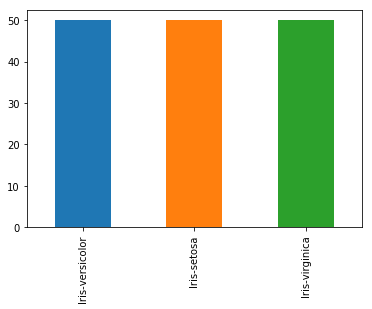

In [11]:
df['label'].value_counts().plot(kind='bar');

### Selecionando apenas as classes setosa e versicolor para a classificação binaria

In [12]:
df = df[ (df['label'] == 'Iris-setosa') | (df['label'] == 'Iris-versicolor') ]

In [13]:
df['label'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Name: label, dtype: int64

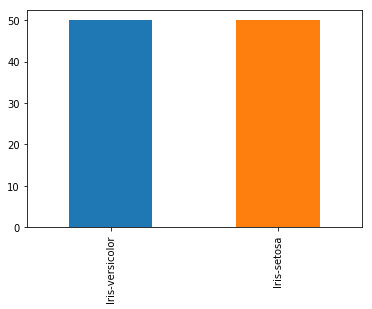

In [14]:
df['label'].value_counts().plot(kind='bar');

### Alterando as labels setosa e versicolor para 1 e -1, respectivamente

In [15]:
df['label'] = np.where(df['label'] == 'Iris-setosa', 1, -1)

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Selecionando as features X e label y

In [17]:
X = df.values[:, :-1]
y = df.values[:, -1]

### Randomização dos dados usando semente (seed)

In [18]:
rs = np.random.RandomState(1)
shuffled_indices = rs.permutation(X.shape[0])
shuffled_indices

array([80, 84, 33, 81, 93, 17, 36, 82, 69, 65, 92, 39, 56, 52, 51, 32, 31,
       44, 78, 10,  2, 73, 97, 62, 19, 35, 94, 27, 46, 38, 67, 99, 54, 95,
       88, 40, 48, 59, 23, 34, 86, 53, 77, 15, 83, 41, 45, 91, 26, 98, 43,
       55, 24,  4, 58, 49, 21, 87,  3, 74, 30, 66, 70, 42, 47, 89,  8, 60,
        0, 90, 57, 22, 61, 63,  7, 96, 13, 68, 85, 14, 29, 28, 11, 18, 20,
       50, 25,  6, 71, 76,  1, 16, 64, 79,  5, 75,  9, 72, 12, 37])

In [19]:
X = X[shuffled_indices]
y = y[shuffled_indices]

In [20]:
X[:5]

array([[5.5, 2.4, 3.8, 1.1],
       [5.4, 3. , 4.5, 1.5],
       [5.5, 4.2, 1.4, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [5. , 2.3, 3.3, 1. ]])

In [21]:
y[:5]

array([-1., -1.,  1., -1., -1.])

In [22]:
n = int(np.count_nonzero(y) * 0.05)
X_train = X[:n]
y_train = y[:n]
X_test = X[n:]
y_test = y[n:]

In [23]:
np.average(X_train), np.average(y_train)

(3.135, -0.6)

In [24]:
np.average(X_test), np.average(y_test)

(3.0486842105263157, 0.031578947368421054)

### Criação, treino e avaliação de modelos usando a métrica acurácia

### Perceptron

In [25]:
model = Perceptron(eta=0.01, n_iter=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

0.7789473684210526

In [26]:
model.errors_

[2, 0, 0, 0, 0, 0, 0, 0, 0, 0]

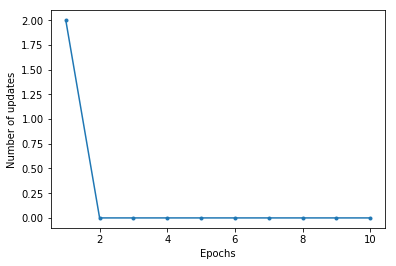

In [27]:
plt.plot(range(1, len(model.errors_)+1), model.errors_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Number of updates');

In [28]:
model = Perceptron(eta=0.0001, n_iter=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

0.9894736842105263

In [29]:
model.errors_

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

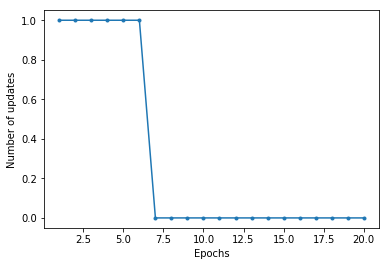

In [30]:
plt.plot(range(1, len(model.errors_)+1), model.errors_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Number of updates');

In [31]:
model = Perceptron(eta=0.000001, n_iter=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

0.4842105263157895

In [32]:
model.errors_

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

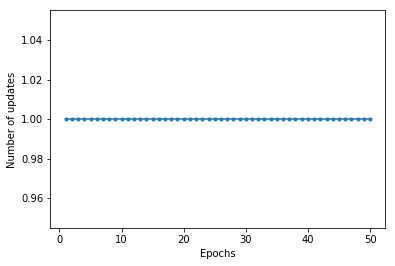

In [33]:
plt.plot(range(1, len(model.errors_)+1), model.errors_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Number of updates');

### AdalineGD

In [34]:
model = AdalineGD(eta=0.001, n_iter=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

0.4842105263157895

In [35]:
model.cost_

[2.3181066620765898,
 1.9479562975710918,
 1.7312496061628049,
 1.6005527159025046,
 1.5181286682237645,
 1.4628583796543393,
 1.42292185430787,
 1.391702725772576,
 1.3654965142923536,
 1.3422282095444757]

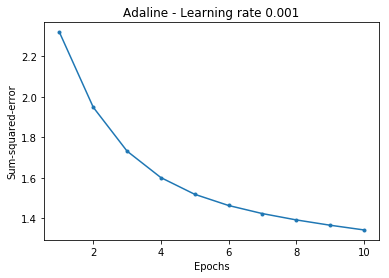

In [36]:
plt.plot(range(1, len(model.cost_)+1), model.cost_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error');
plt.title('Adaline - Learning rate 0.001');

In [37]:
model = AdalineGD(eta=0.0001, n_iter=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

0.4842105263157895

In [38]:
model.cost_

[2.3181066620765898,
 2.2765745247116835,
 2.236999808946894,
 2.1992852897800335,
 2.1633385793722333,
 2.129071886375906,
 2.0964017872373066,
 2.065249008877911,
 2.03553822218845,
 2.007197845797622,
 1.9801598596042624,
 1.9543596275872035,
 1.9297357294311959,
 1.9062298005302687,
 1.8837863799516947,
 1.862352765964489,
 1.8418788787560731,
 1.822317129979444,
 1.8036222987910147,
 1.7857514140561677]

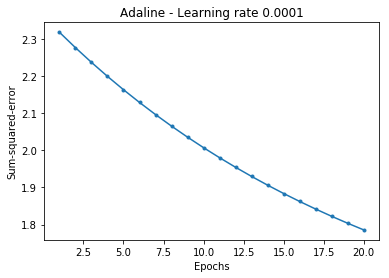

In [39]:
plt.plot(range(1, len(model.cost_)+1), model.cost_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error');
plt.title('Adaline - Learning rate 0.0001');

In [40]:
model = AdalineGD(eta=0.01, n_iter=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

0.5157894736842106

In [41]:
model.cost_

[2.3181066620765898,
 3.133703931377976,
 5.333324957099175,
 10.681957484251328,
 23.261480435362056,
 52.502069646877416,
 120.18133619416713,
 276.58425039973406,
 637.8137149042764,
 1471.9343074979317,
 3397.8633418925683,
 7844.575947058678,
 18111.330120986204,
 41815.54280439033,
 96544.51182045165,
 222904.26302843436,
 514647.07845825463,
 1188230.7409120956,
 2743418.7825745856,
 6334078.64418134,
 14624290.404789016,
 33764953.566510625,
 77957429.78537995,
 179990203.54446924,
 415566206.7688315,
 959470398.0311751,
 2215250975.0879784,
 5114630834.705013,
 11808796777.328259,
 27264466553.993225,
 62948931249.480064,
 145338179920.27612,
 335560685833.23694,
 774751506718.0033,
 1788767047222.4124,
 4129953309524.172,
 9535346911346.047,
 22015464559862.66,
 50829894737217.3,
 117357423549762.64,
 270957965454019.8,
 625595014122396.4,
 1444390538728099.8,
 3334847595123378.0,
 7699585523796968.0,
 1.7777009457630268e+16,
 4.104403597829418e+16,
 9.476357052082435e+16,
 2

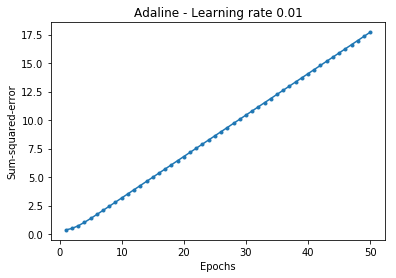

In [42]:
plt.plot(range(1, len(model.cost_)+1), np.log10(model.cost_), marker='.')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error');
plt.title('Adaline - Learning rate 0.01');

In [43]:
model = AdalineGD(eta=0.00001, n_iter=30)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

0.4842105263157895

In [44]:
model.cost_

[2.3181066620765898,
 2.3139082773309556,
 2.3097299181243347,
 2.305571483844196,
 2.3014328743843246,
 2.297313990142279,
 2.293214732016851,
 2.289135001405545,
 2.2850747002020686,
 2.281033730793837,
 2.277011996059483,
 2.2730093993663916,
 2.269025844568234,
 2.265061236002527,
 2.2611154784881915,
 2.2571884773231328,
 2.253280138281832,
 2.2493903676129423,
 2.2455190720369096,
 2.241666158743591,
 2.237831535389898,
 2.234015110097443,
 2.2302167914502014,
 2.226436488492186,
 2.222674110725128,
 2.218929568106179,
 2.215202771045615,
 2.211493630404556,
 2.2078020574927004,
 2.204127964066063]

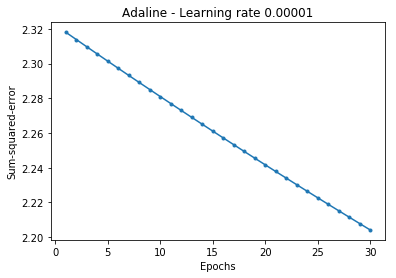

In [45]:
plt.plot(range(1, len(model.cost_)+1), model.cost_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error');
plt.title('Adaline - Learning rate 0.00001');